# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [5]:
# Import your libraries:#

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


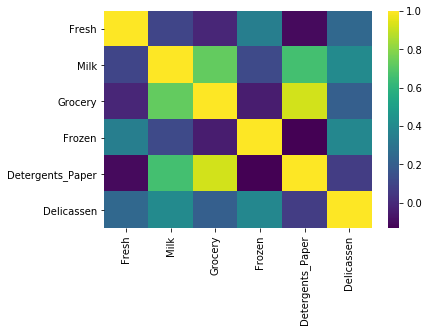

In [37]:
sns.heatmap(data=customers.corr(),cmap='viridis')

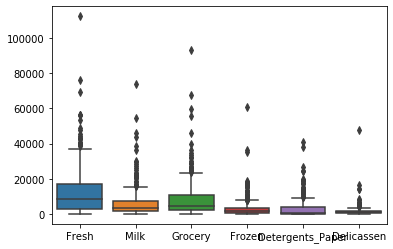

In [14]:
sns.boxplot(data=customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

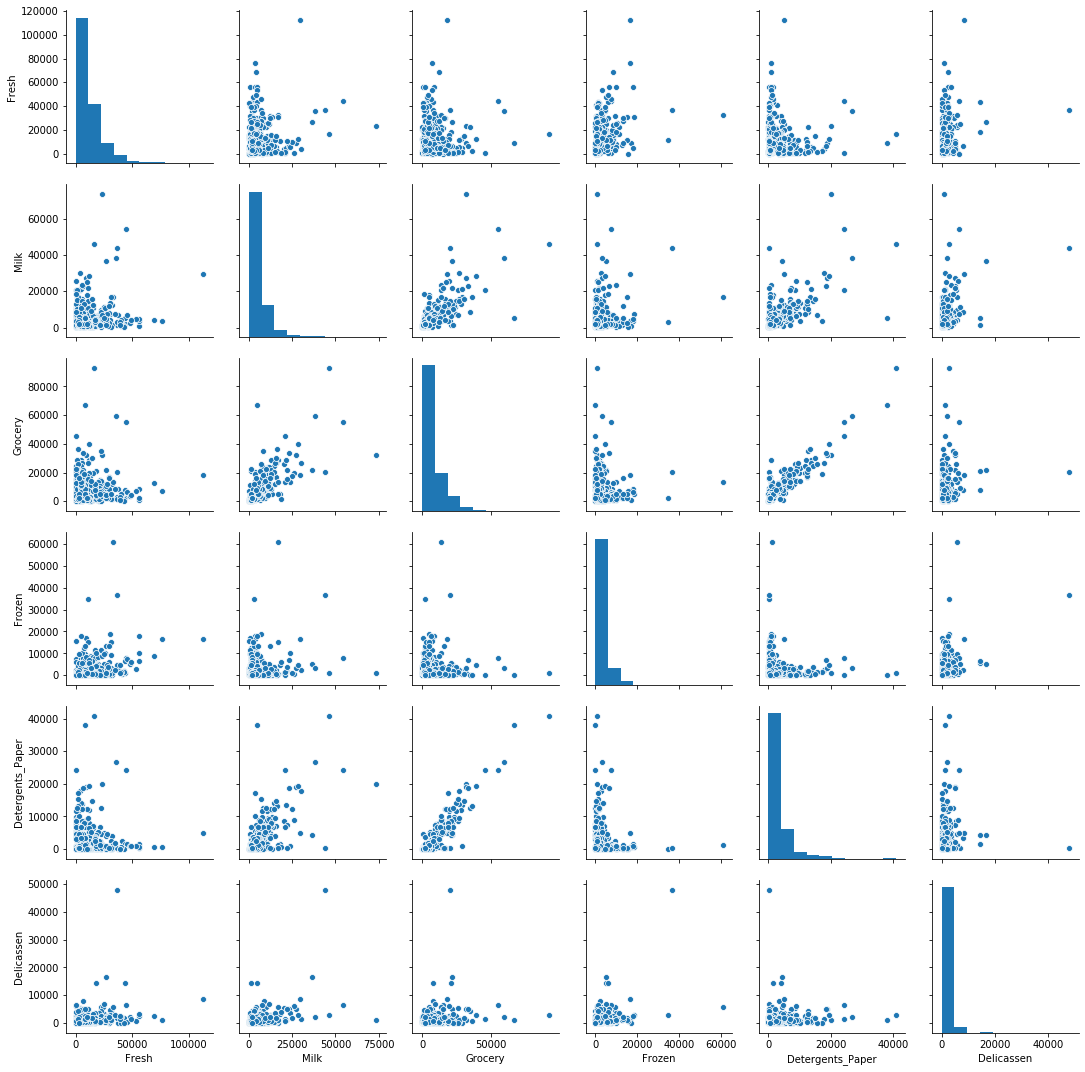

In [16]:
sns.pairplot(data=customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

*1. What does each column mean?* 

*The Channel refers to the sales channel. Region refers to the region where the spend was made. Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicassen show the ammount of money spent annually in these categories of products.*

*2. Any categorical data to convert?*

*Channel and Region are categorical variables, we could change their types to 'category'.*

*3. Any missing data to remove?*

*There are no null values to remove.*

*4. Column collinearity - any high correlations?*

*There's high correlation between Groceries and Detergents_Paper.*

*5. Descriptive statistics - any outliers to remove?*

*There are outliers in all numerical columns as we can see in the box plots.*

*6. Column-wise data distribution - is the distribution skewed?*

*All columns appear to be left-skewed*

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [36]:
customers[["Channel","Region"]]=customers[["Channel","Region"]].astype('category')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null category
Region              440 non-null category
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: category(2), int64(6)
memory usage: 21.8 KB


*The only transformation needed (in my oppinion) is changing the type of the categorical variables to 'category'*

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [39]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler=StandardScaler()
customers_scale=customers.copy()
cols=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
customers_scale[cols] = scaler.fit_transform(customers_scale[cols])
customers_scale.head()



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(customers_scale)
customers['labels']=kmeans.labels_
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1


Count the values in `labels`.

In [64]:
customers.labels.value_counts()


1    171
2     99
0     89
6     40
3     32
5      6
7      2
4      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [65]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)
customers['labels_DBSCAN']=dbscan.labels_
customers.head()




,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1


Count the values in `labels_DBSCAN`.

In [66]:
customers['labels_DBSCAN'].value_counts()


-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

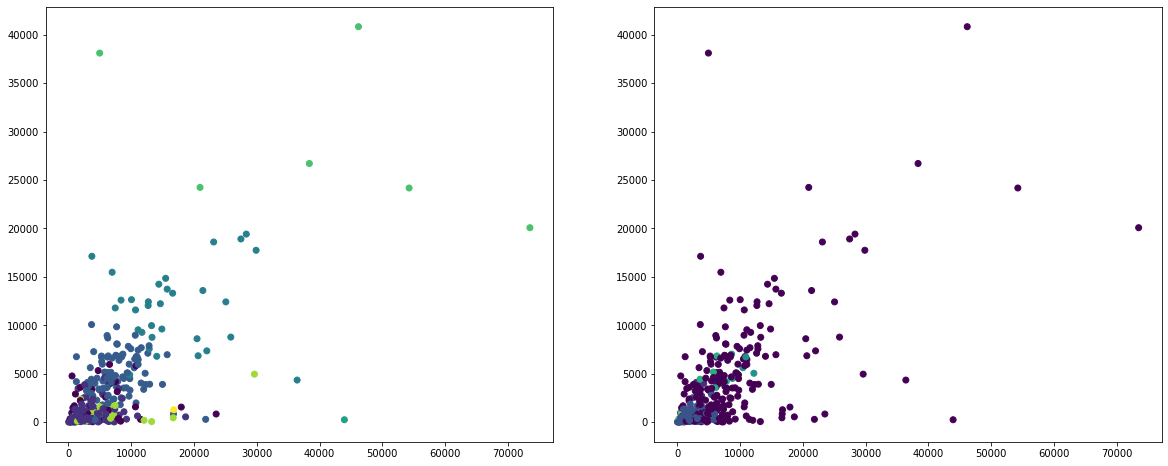

In [67]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.scatter(customers.Milk,customers.Detergents_Paper, c=customers.labels)
plt.subplot(1, 2, 2)
plt.scatter(customers.Milk,customers.Detergents_Paper, c=customers.labels_DBSCAN)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

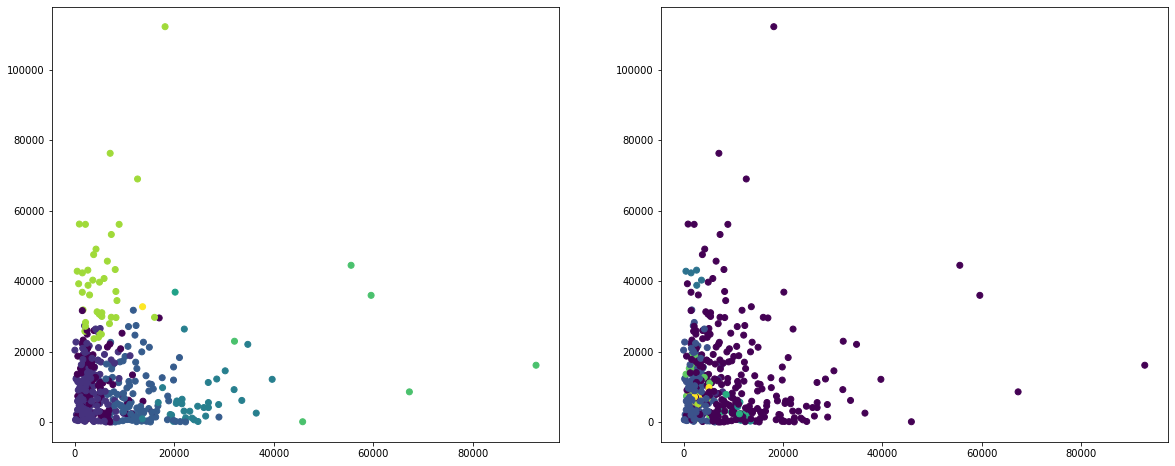

In [68]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.scatter(customers.Grocery,customers.Fresh, c=customers.labels)
plt.subplot(1, 2, 2)
plt.scatter(customers.Grocery,customers.Fresh, c=customers.labels_DBSCAN)


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

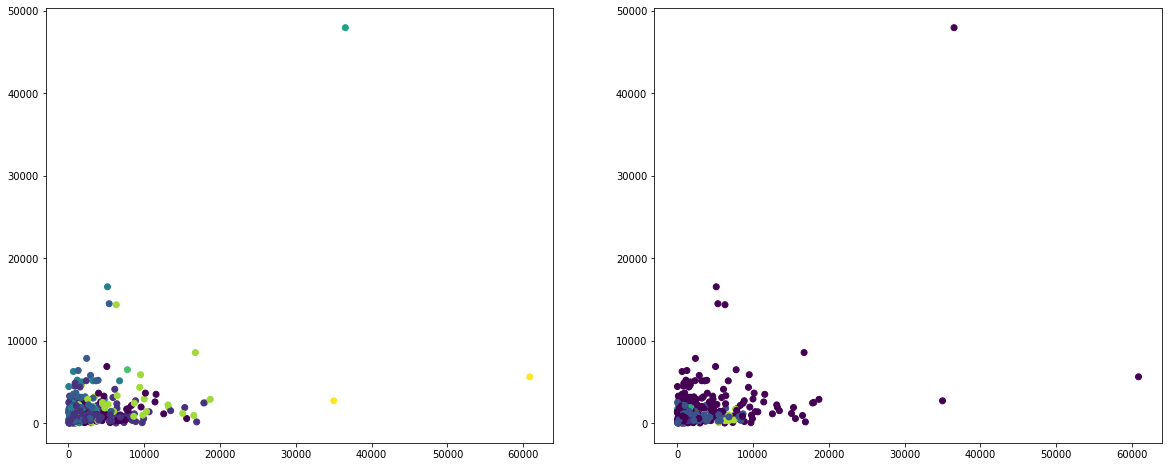

In [69]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.scatter(customers.Frozen,customers.Delicassen, c=customers.labels)
plt.subplot(1, 2, 2)
plt.scatter(customers.Frozen,customers.Delicassen, c=customers.labels_DBSCAN)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [70]:
display(customers.groupby(['labels']).mean())
display(customers.groupby(['labels_DBSCAN']).mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0,10158.157303,3259.449438,4230.191011,3154.202247,978.696629,1098.561798,1.404494
1,9100.877193,2739.292398,3065.766082,2757.187135,659.830409,972.081871,0.497076
2,8079.636364,7658.202020,12103.191919,1307.434343,4874.767677,1668.424242,-0.393939
3,6079.750000,16602.312500,24882.625000,1891.000000,11776.781250,2456.000000,-1.000000
4,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,-1.000000
5,21350.000000,39710.333333,58864.833333,2202.666667,29017.000000,2494.500000,-1.000000
6,40409.775000,5008.125000,5358.050000,6596.775000,819.475000,2299.050000,-0.525000
7,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000,-1.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,
-1,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,2.152941
0,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,2.000000
1,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,1.076923
2,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,6.000000
3,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,2.000000
4,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,2.000000
5,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,0.000000
6,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,0.000000
7,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.000000


Which algorithm appears to perform better?

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [77]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(customers_scale)

    print(f"For {n_clusters} clusters "+"Silhouette Coefficient: %0.3f"
      % silhouette_score(customers_scale, kmeans.predict(customers_scale)))
    


For 2 clusters Silhouette Coefficient: 0.497
For 3 clusters Silhouette Coefficient: 0.283
For 4 clusters Silhouette Coefficient: 0.292
For 5 clusters Silhouette Coefficient: 0.305
For 6 clusters Silhouette Coefficient: 0.269
For 7 clusters Silhouette Coefficient: 0.283
For 8 clusters Silhouette Coefficient: 0.295
For 9 clusters Silhouette Coefficient: 0.297
For 10 clusters Silhouette Coefficient: 0.292
For 11 clusters Silhouette Coefficient: 0.289
For 12 clusters Silhouette Coefficient: 0.298
For 13 clusters Silhouette Coefficient: 0.286
For 14 clusters Silhouette Coefficient: 0.283
For 15 clusters Silhouette Coefficient: 0.290
For 16 clusters Silhouette Coefficient: 0.258
For 17 clusters Silhouette Coefficient: 0.222
For 18 clusters Silhouette Coefficient: 0.217
For 19 clusters Silhouette Coefficient: 0.222


In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here